<img src="https://catalogo.uniandes.edu.co/-/media/Institution/Universidad-de-los-Andes/ingenieria/maestria-int-toma.ashx?la=es-ES">

# Exercise 13

## Analyze class homeworks

by [Camilo Andrés Suarez, Nestor Fabian Cholo y Germán Guillermo Torres]

version 1.0, Julio 2020


In [324]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_excel('../datasets/Consolidado_respuestas_escribir_v2.xlsx')
df = df.fillna('')
df.head(3)

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,
2,M,Una serie de tiempo es una colección de datos ...,,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."


# Exercise 13.1

Analyze the writing patterns of each student

In [325]:
df.dtypes

Genero                                        object
E1 - Examples of Time Series Analysis         object
E4 - Panel Data                               object
E6 - Decison Trees                            object
E8 - Ensemble Trees Overview                  object
E10 - REST-API                                object
E11 - Natural Language Processing Overview    object
dtype: object

In [326]:
# Se transforma la variable a Genero a categorica
df['Genero']=df['Genero'].astype('category')

In [327]:
# Se crea la muestra de entrenamiento (X_train, y_train) y de evaluación (X_test, y_test) para la ejecución y calibración del modelo.
X = df.loc[:,df.columns!='Genero']
y = df.loc[:,['Genero']]

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,random_state=42)

In [328]:
# Identificar idioma de cada tarea 

df['I_E1'] = np.where(df['E1 - Examples of Time Series Analysis'].str.contains("the", case=False, na=False), 'Ingles', 'Español')
df['I_E4'] = np.where(df['E4 - Panel Data'].str.contains("the", case=False, na=False), 'Ingles', 'Español')
df['I_E6'] = np.where(df['E6 - Decison Trees'].str.contains("the", case=False, na=False), 'Ingles', 'Español')
df['I_E8'] = np.where(df['E8 - Ensemble Trees Overview'].str.contains("the", case=False, na=False), 'Ingles', 'Español')
df['I_E10'] = np.where(df['E10 - REST-API'].str.contains("the", case=False, na=False), 'Ingles', 'Español')
df['I_E11'] = np.where(df['E11 - Natural Language Processing Overview'].str.contains("the", case=False, na=False), 'Ingles', 'Español')


In [329]:
df.head(1)

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,I_E1,I_E4,I_E6,I_E8,I_E10,I_E11
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,,Ingles,Ingles,Ingles,Ingles,Español,Español


In [330]:
#Calculo de número de palabras por Tarea 

df["L_E1"] = df['E1 - Examples of Time Series Analysis'].str.split().str.len()
df["L_E4"] = df['E4 - Panel Data'].str.split().str.len()
df["L_E6"] = df['E6 - Decison Trees'].str.split().str.len()
df["L_E8"] = df['E8 - Ensemble Trees Overview'].str.split().str.len()
df["L_E10"] = df['E10 - REST-API'].str.split().str.len()
df["L_E11"] = df['E11 - Natural Language Processing Overview'].str.split().str.len()

In [331]:
#Calculo de promedio de palabras, minimo y maximo para cada estudiante 
df["Promedio"] = df.mean(axis=1)
df["Minimo"] = df.min(axis=1)
df["Maximo"] = df.max(axis=1)

In [332]:
#Detalle de promedio de palabras por genero
df.groupby(['Genero'])['Promedio'].describe()

#Se identificá que en promedio las mujeres usan 247 palabras por tarea mientras que los hombres 231.

,count,mean,std,min,25%,50%,75%,max
Genero,,,,,,,,
F,10.0,247.600000,77.561175,92.333333,202.416667,258.5,294.666667,370.833333
M,36.0,231.106481,64.589303,71.333333,195.666667,232.0,264.291667,411.500000


In [333]:
#Detalle de promedio de palabras por genero
df.groupby(['I_E1'])['Promedio'].describe()

#Se identificá que para la tarea número 1, 32 tareas se escribieron en español y 14 en ingles.

,count,mean,std,min,25%,50%,75%,max
I_E1,,,,,,,,
Español,32.0,227.552083,70.703447,71.333333,192.500000,234.916667,269.208333,411.500000
Ingles,14.0,251.011905,56.809039,184.500000,207.791667,245.666667,273.625000,370.833333


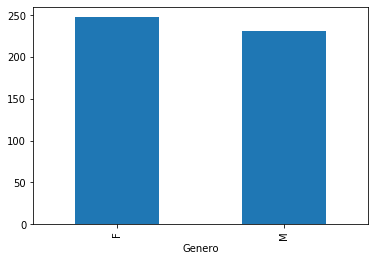

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df.groupby(['Genero']).mean()['Promedio'].plot(kind = 'bar')

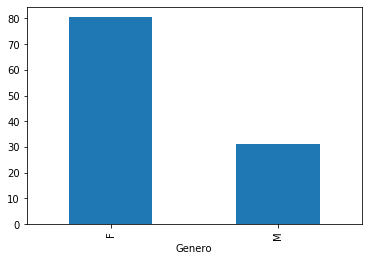

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df.groupby(['Genero']).mean()['Minimo'].plot(kind = 'bar')

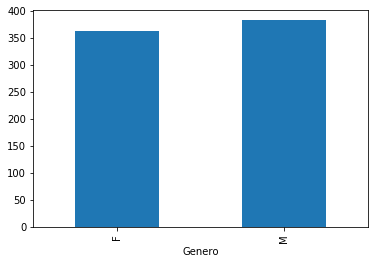

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df.groupby(['Genero']).mean()['Maximo'].plot(kind = 'bar')

# Exercise 13.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.


### Tokenization

In [337]:
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

### Create the target feature (number of shares)

In [338]:
y.dtypes

Genero    category
dtype: object

In [339]:
df['y'] = y

In [340]:
#X = df.loc[:,['E1 - Examples of Time Series Analysis']]
#X = df['E1 - Examples of Time Series Analysis']

X = df.loc[:,df.columns!='Genero']

In [341]:
X.dtypes

E1 - Examples of Time Series Analysis          object
E4 - Panel Data                                object
E6 - Decison Trees                             object
E8 - Ensemble Trees Overview                   object
E10 - REST-API                                 object
E11 - Natural Language Processing Overview     object
I_E1                                           object
I_E4                                           object
I_E6                                           object
I_E8                                           object
I_E10                                          object
I_E11                                          object
L_E1                                            int64
L_E4                                            int64
L_E6                                            int64
L_E8                                            int64
L_E10                                           int64
L_E11                                           int64
Promedio                    

In [342]:
#create document-term matrices
X.tail(2)

,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview,I_E1,I_E4,I_E6,I_E8,...,L_E1,L_E4,L_E6,L_E8,L_E10,L_E11,Promedio,Minimo,Maximo,y
44,Los tres usos comunes que identifico en la vid...,"Para delimitar las diferencias, es importante ...",Los árboles de decisión son un tipo algoritmos...,Los Ensembles o Métodos de Ensamblaje son una ...,"Los microservicios, también llamados Micro Ser...",,Español,Español,Español,Español,...,341,244,461,393,358,0,299.5,0.0,461.0,M
45,The time series analysis is important because ...,Los datos de series temporales son un conjunto...,Los árboles de decisión son una técnica estadí...,Los ensamblajes o ensembles consisten en métod...,Los microservicios son un enfoque arquitectóni...,,Ingles,Español,Español,Español,...,245,173,352,357,421,0,258.0,0.0,421.0,M


In [343]:
#verificar un registro con más detalle
X.iloc[44]

E1 - Examples of Time Series Analysis         Los tres usos comunes que identifico en la vid...
E4 - Panel Data                               Para delimitar las diferencias, es importante ...
E6 - Decison Trees                            Los árboles de decisión son un tipo algoritmos...
E8 - Ensemble Trees Overview                  Los Ensembles o Métodos de Ensamblaje son una ...
E10 - REST-API                                Los microservicios, también llamados Micro Ser...
E11 - Natural Language Processing Overview                                                     
I_E1                                                                                    Español
I_E4                                                                                    Español
I_E6                                                                                    Español
I_E8                                                                                    Español
I_E10                                   

In [344]:
Xconc=X['E1 - Examples of Time Series Analysis']+' '+X['E4 - Panel Data']+' '+X['E6 - Decison Trees']+' '+X['E8 - Ensemble Trees Overview']+' '+X['E10 - REST-API']+' '+X['E11 - Natural Language Processing Overview']

In [345]:
vect = CountVectorizer()

In [346]:
X_dtm= vect.fit_transform(Xconc)

In [347]:
temp=X_dtm.todense()

In [348]:
temp.shape #matriz de 46 obervaciones con 2980 palabras

(46, 7567)

In [349]:
vect.vocabulary_ # palabra y posición dentro de la matriz

{'one': 4944,
 'of': 4918,
 'the': 6921,
 'most': 4641,
 'valuable': 7268,
 'application': 627,
 'time': 6958,
 'series': 6387,
 'analysis': 542,
 'is': 4022,
 'financial': 3183,
 'due': 2465,
 'to': 6970,
 'amount': 525,
 'information': 3846,
 'that': 6920,
 'given': 3417,
 'by': 1071,
 'market': 4379,
 'in': 3740,
 'different': 2293,
 'periods': 5204,
 'stock': 6638,
 'price': 5514,
 'could': 1833,
 'give': 3416,
 'seconds': 6284,
 'minutes': 4551,
 'hours': 3617,
 'days': 2004,
 'on': 4941,
 'other': 5030,
 'hand': 3509,
 'there': 6929,
 'are': 675,
 'variables': 7277,
 'weekly': 7438,
 'basis': 919,
 'oil': 4934,
 'inventories': 3987,
 'monthly': 4632,
 'pmi': 5303,
 'consumer': 1698,
 'index': 3791,
 'or': 4991,
 'yearly': 7511,
 'quarterly': 5746,
 'economic': 2499,
 'growth': 3464,
 'sales': 6220,
 'income': 3759,
 'and': 552,
 'indicators': 3797,
 'from': 3285,
 'company': 1450,
 'for': 3229,
 'reason': 5834,
 'three': 6937,
 'great': 3455,
 'examples': 2984,
 'forward': 3261,


### NGRAM

In [350]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 4))
X_dtm = vect.fit_transform(Xconc)
X_dtm.shape

(46, 149054)

In [351]:
# last 50 features
print(vect.get_feature_names()[-1000:-950])

['you are', 'you are studying', 'you are studying financial', 'you can', 'you can also', 'you can also model', 'you can analyze', 'you can analyze the', 'you can found', 'you can found this', 'you can predict', 'you can predict the', 'you don', 'you don need', 'you don need server', 'you have', 'you have many', 'you have many random', 'you if', 'you if these', 'you if these two', 'you ll', 'you ll see', 'you ll see radical', 'you might', 'you might not', 'you might not exploit', 'you need', 'you need to', 'you need to know', 'you re', 'you re looking', 'you re looking at', 'you write', 'you write textio', 'you write textio provides', 'your', 'your audience', 'your audience the', 'your audience the application', 'your writing', 'your writing like', 'your writing like run', 'youtube', 'youtube com', 'youtube com watch', 'youtube com watch un9zobfjbh0', 'yt', 'yt where', 'yt where are']


### Text Similarity

In [352]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

In [353]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import cosine
import numpy as np

def cosine_distance_countVectorizer(s1, s2):

    vect = CountVectorizer()
    X_dtm = vect.fit_transform([s1, s2]).todense()
    
    return 1-cosine(X_dtm[0], X_dtm[1])

Similaridad entre dos (2) estudiantes:

In [354]:
jaccard_similarity(Xconc[0],Xconc[1])

0.7045454545454546

Similaridad entre estudiantes:

In [370]:
#Inicialización de variables 
i=0
j=1
similarity= .45
sm = pd.DataFrame([[i, j,similarity]], columns=('Alumno-i','Alumno-j','jaccard'))
sm.drop([0],axis=0)

,Alumno-i,Alumno-j,jaccard


In [ ]:
Tarea1 =df.iloc[:,[1]].dropna()
lim_sup=Tarea1.shape[0]

for i in range(0,lim_sup):
    for j in range(i+1,lim_sup):
        RA_1=Tarea1.iloc[i,0]
        RA_2=Tarea1.iloc[j,0]
        similarity=jaccard_similarity(RA_1, RA_2)
        dft = pd.DataFrame([[i, j,similarity]], columns=('Alumno-i','Alumno-j','jaccard'))
        sm=dft.append(sm)

Se identifica alta similaridad entre algunas de las tareas, esta pueder ser reflejada por la consulta de las mismas fuentes de información. 

In [373]:
sm.sort_values(by='jaccard', ascending=False)

,Alumno-i,Alumno-j,jaccard
0,4,45,0.853659
0,1,7,0.835616
0,0,23,0.833333
0,3,38,0.826923
0,1,11,0.805556
0,2,22,0.804348
0,1,41,0.800000
0,1,36,0.785714
0,5,35,0.784314
0,2,10,0.782609


# Exercise 13.3

Create a classifier to predict the gender of each student



### Predict shares

In [375]:
# Default CountVectorizer
vect = CountVectorizer()
X_dtm = vect.fit_transform(Xconc)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

count    10.000000
mean      0.525000
std       0.249722
min       0.200000
25%       0.287500
50%       0.550000
75%       0.750000
max       0.800000
dtype: float64

In [380]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_dtm = vect.fit_transform(Xconc)
    print('Features: ', X_dtm.shape[1])
    nb = MultinomialNB()
    print(pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe())
    
# cambiar vectorizador

In [379]:
# set of stop words
print(vect.get_stop_words())

frozenset({'same', 'eleven', 'somewhere', 'interest', 'our', 'herein', 'of', 'thus', 'her', 'twenty', 'via', 'bill', 'among', 'about', 'whenever', 'even', 'them', 'an', 'go', 'first', 'amount', 'meanwhile', 'five', 'themselves', 'formerly', 'down', 'due', 'everything', 'twelve', 'do', 'however', 'is', 'detail', 'bottom', 'under', 'your', 'somehow', 'fifteen', 'whereupon', 'if', 'or', 'found', 'never', 'alone', 'off', 'three', 'sometimes', 'together', 'two', 'afterwards', 'be', 'during', 'all', 'none', 'there', 'were', 'well', 'wherever', 'hereupon', 'throughout', 'yours', 'per', 'both', 'many', 'by', 'etc', 'amongst', 'take', 'neither', 'un', 'been', 'last', 'then', 'seem', 'ours', 'thereafter', 'whatever', 'can', 'couldnt', 'see', 'already', 'around', 'hundred', 'out', 'nine', 'seemed', 'give', 'show', 'behind', 'fire', 'through', 'anyone', 'thin', 'anyhow', 'these', 'as', 'a', 'made', 'himself', 'might', 'ourselves', 'wherein', 'enough', 'their', 'before', 'get', 'she', 'where', 'amo

# Exercise 13.4
Classify group members into different subgroups (minimum 3) according to a characteristic of your choice.

In [383]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [388]:
df.dtypes

Genero                                        category
E1 - Examples of Time Series Analysis           object
E4 - Panel Data                                 object
E6 - Decison Trees                              object
E8 - Ensemble Trees Overview                    object
E10 - REST-API                                  object
E11 - Natural Language Processing Overview      object
I_E1                                            object
I_E4                                            object
I_E6                                            object
I_E8                                            object
I_E10                                           object
I_E11                                           object
L_E1                                             int64
L_E4                                             int64
L_E6                                             int64
L_E8                                             int64
L_E10                                            int64
L_E11     

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


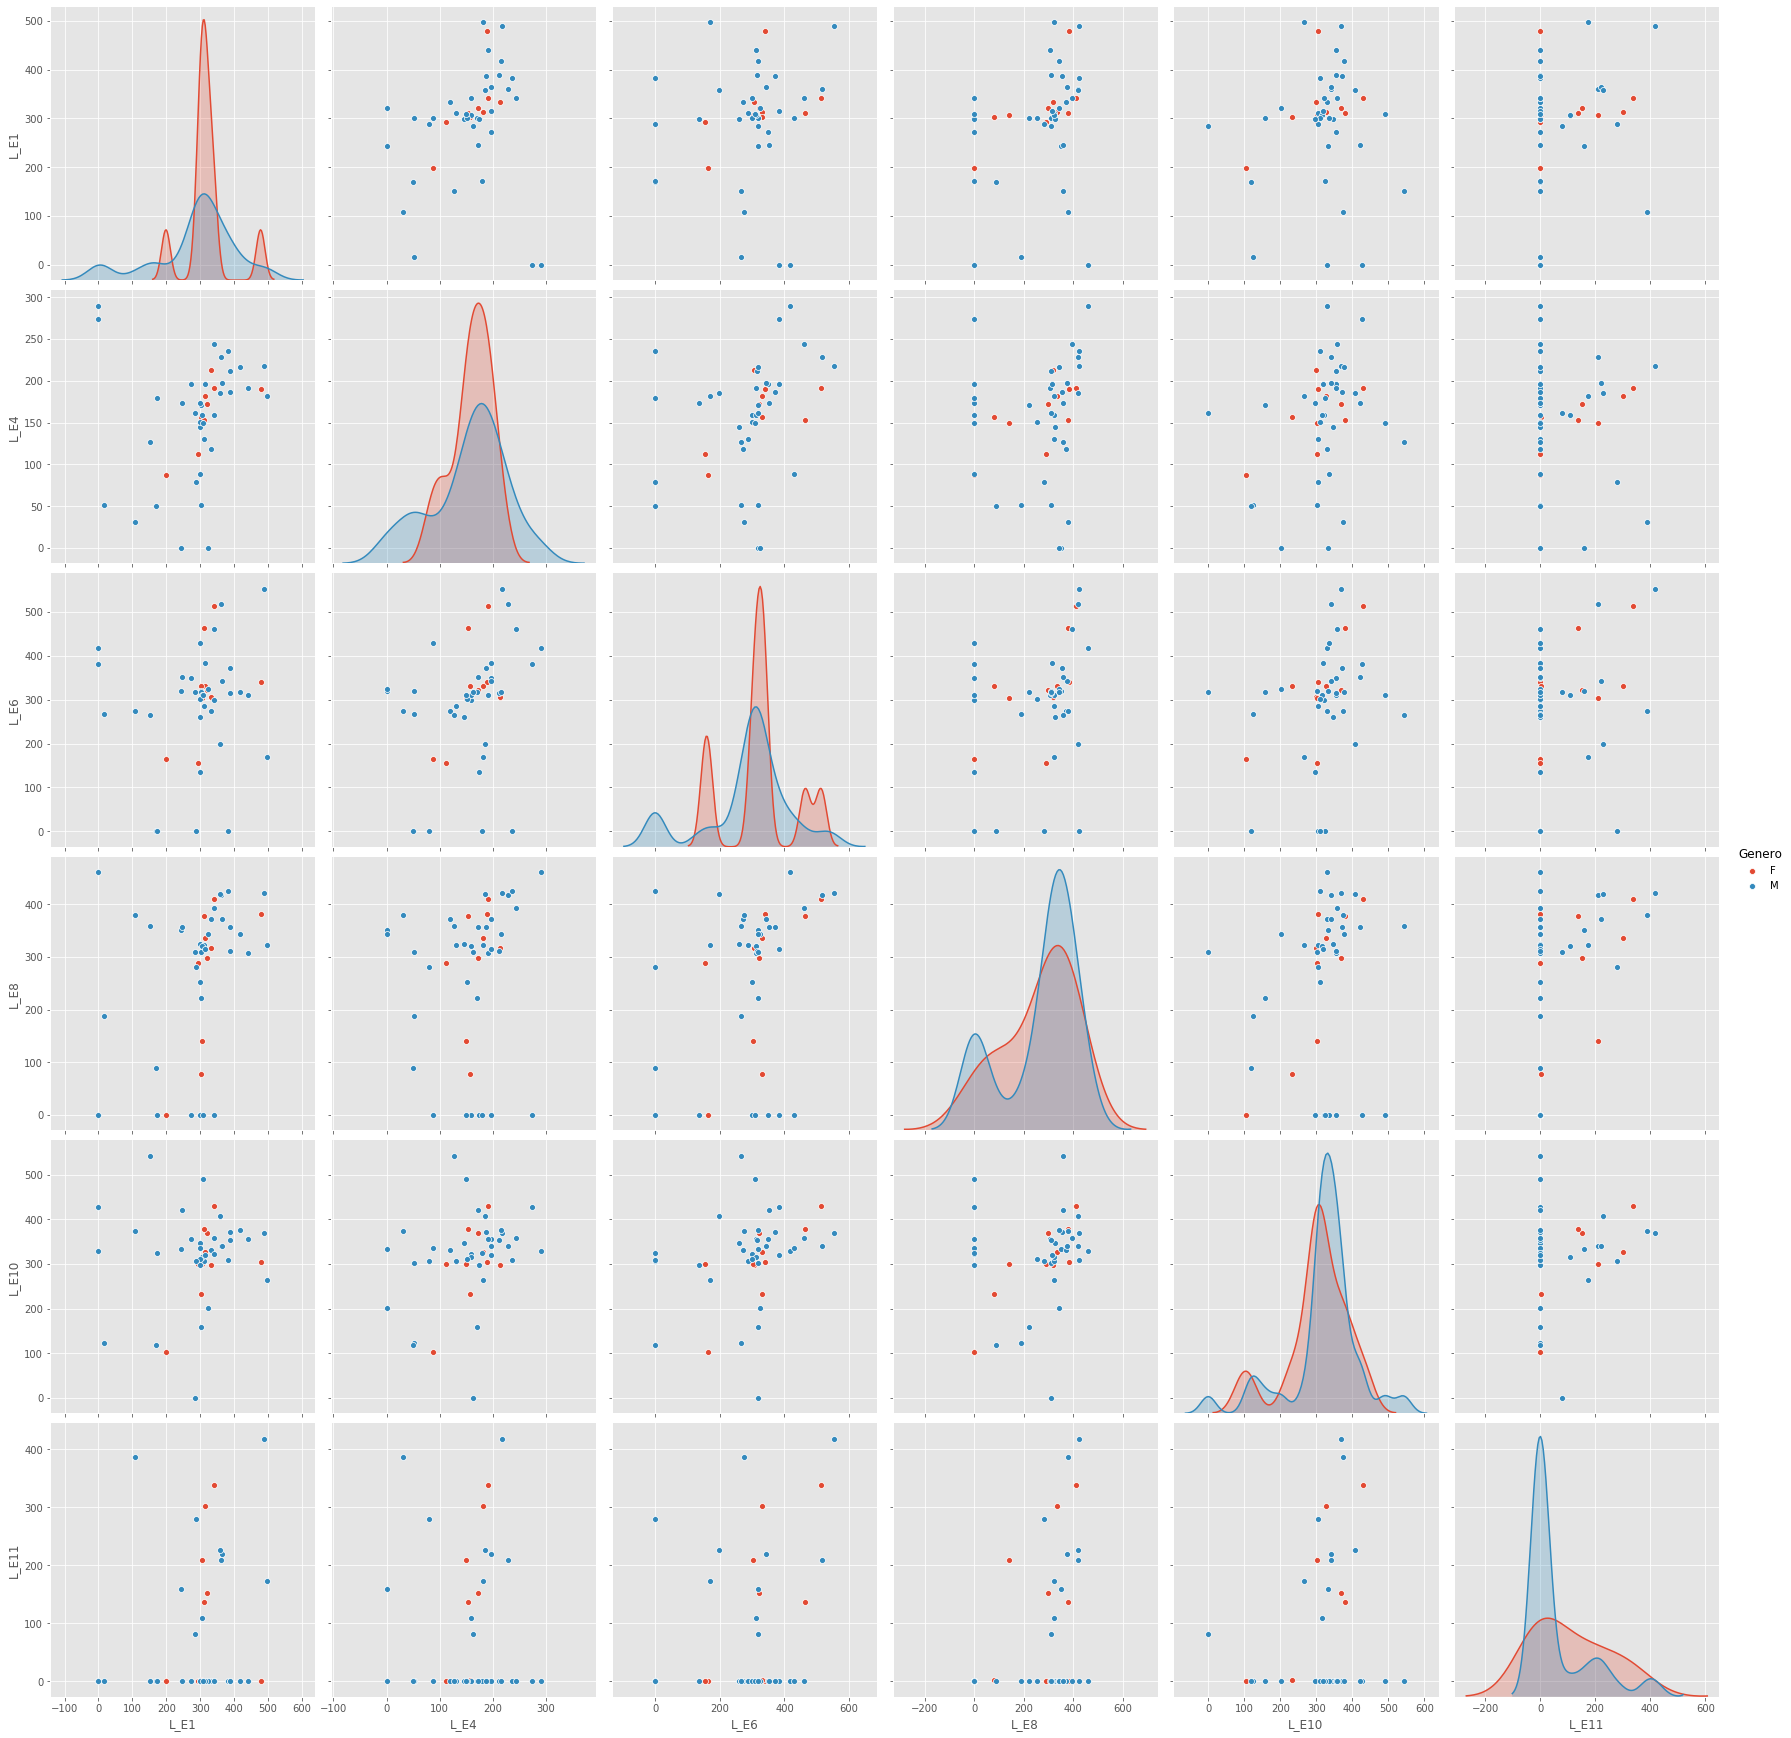

In [391]:
sb.pairplot(df.dropna(), hue='Genero',size=4,vars=["L_E1","L_E4","L_E6","L_E8","L_E10","L_E11"],kind='scatter')

In [407]:
X = np.array(df[["L_E1","L_E4","L_E6","L_E8","L_E10","L_E11"]])
y = np.array(df['Promedio'])
X.shape

(46, 6)

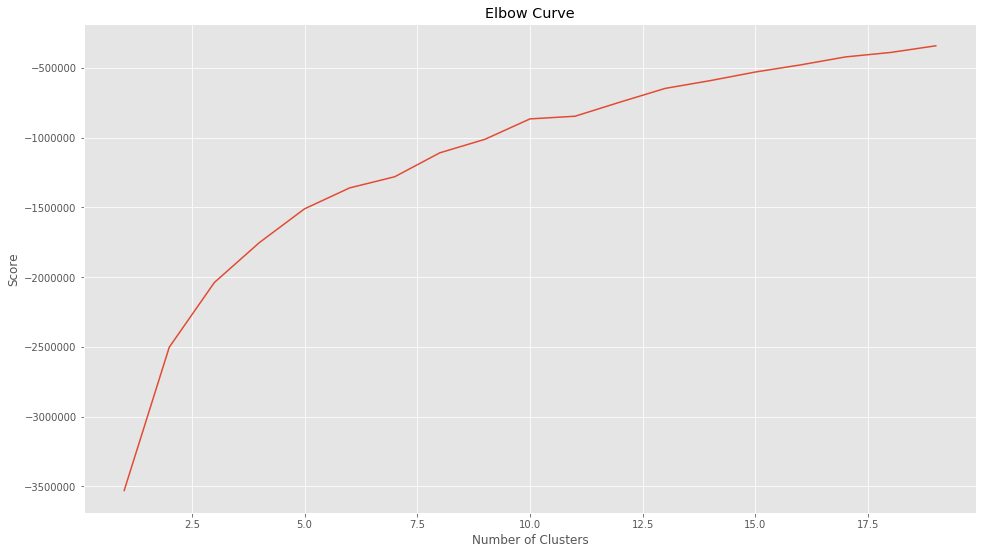

In [408]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Definición de Cluster por promedio de palabras

In [409]:
#Ejecución

kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[3.08583333e+02 1.37666667e+02 2.79250000e+02 3.25666667e+02
  3.10000000e+02 2.03083333e+02]
 [1.39000000e+02 9.20000000e+01 1.07750000e+02 6.90000000e+01
  1.67500000e+02 0.00000000e+00]
 [2.60571429e+02 1.71142857e+02 3.19714286e+02 1.11428571e+01
  3.51571429e+02 4.28571429e-01]
 [3.97000000e+02 2.12333333e+02 5.27333333e+02 4.16666667e+02
  3.80333333e+02 3.22333333e+02]
 [3.16900000e+02 1.67750000e+02 3.03850000e+02 3.38050000e+02
  3.30100000e+02 1.42108547e-14]]


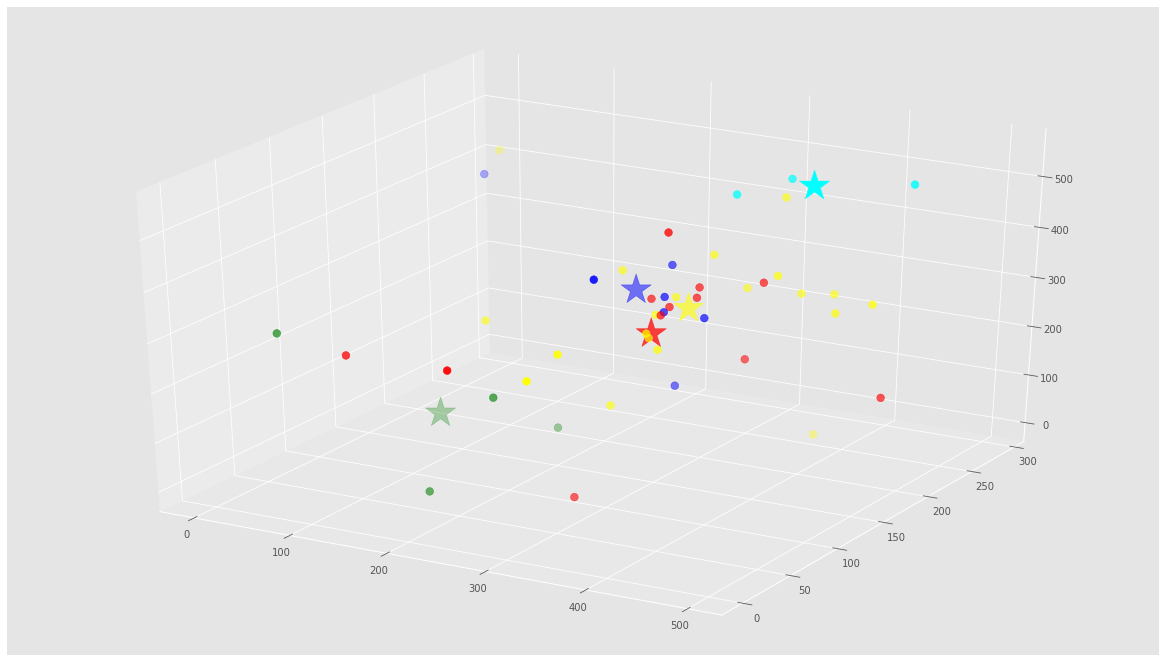

In [412]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

    #visualización de grupos
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

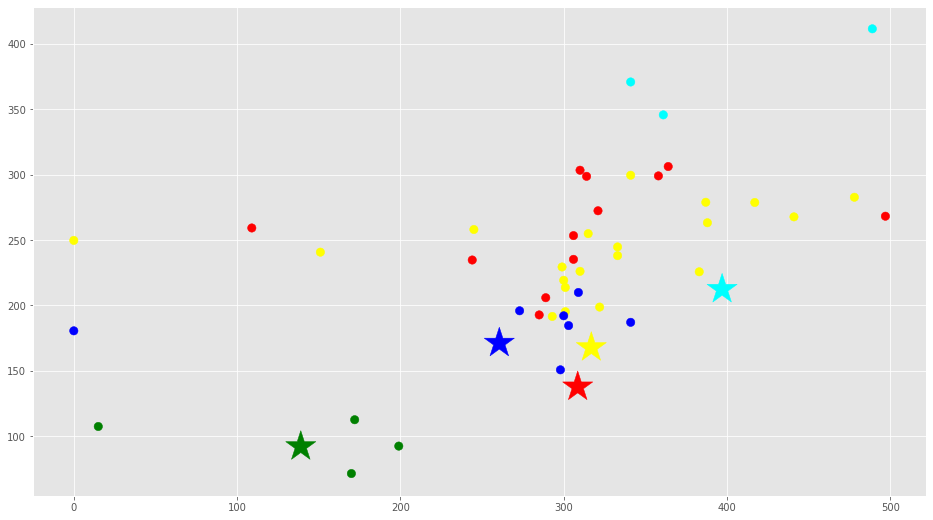

In [413]:
# Getting the values and plotting it
f1 = df['L_E1'].values
f2 = df['Promedio'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()